# Assignment 3

### DATA 608 Winter 2023

The purpose of this assignment is to learn to apply the basics of programming with Apache Spark.<br>
To this end you will produce a single Jupyter notebook, and submit it to D2L for grading.<br>

This is an individual assignment, and all work must be completed individually.

Your notebook must implement the following parts:

## Part A: Set-up


### Question 1 - Start Spark and get a Spark context

- Python code to start Spark on Google Colab as well as the jupyter/pyspark-notebook container image has been provided during lectures
- You are permitted to implement and test your assignment on another platform (other than Google Colab) but you must document in this section how you got this platform up and running for Spark.
- You can choose the following to implement your assignment:<br>
  Google Colab, Kaggle, DataBricks community edition, Google DataProc, your own desktop Spark installation ... (Just be clear where your implementation was done)


_My implementation was done in jupyter/pyspark-notebook container image on my local machine._

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

### Question 2 - Download remote CSV dataset

- Pick a remote CSV dataset for this assignment - it can be the same file you are using for your project (however, we recommend that we try something new!
- It does not have to be a "big" dataset, for example:
    * California Housing Dataset (this comes with scikit-learn and is easily accessible on many platforms, such as Google Colab): https://www.kaggle.com/datasets/camnugent/california-housing-prices
    * Drug Review Dataset (https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)
    * TV News Channel Commercial Detection Dataset (https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset)
    * Victoria Era Authorship Atribution: https://archive.ics.uci.edu/ml/datasets/Victorian+Era+Authorship+Attribution
    * New York Taxi Trip Data: https://data.cityofnewyork.us/Transportation/2018-Yellow-Taxi-Trip-Data/t29m-gskq

- Be sure to include information about the license where appropriate.
- Write code that downloads this remote CSV file to a filesystem that Spark can access
  Python code for this has been provided during lectures
- Optional - you may skip to step 4 if the parquet file from step 3 already exists

I chose the covtype dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Covertype).<br>
The dataset is licensed under the Open Data Commons License (https://opendatacommons.org/licenses/pddl/).<br>
The dataset is also available on Kaggle (https://www.kaggle.com/uciml/covertype-dataset).<br>


In [2]:
from sklearn.datasets import fetch_covtype
import pandas as pd
# Load the dataset
covtype = fetch_covtype()

In [3]:
# Save covtype to csv file
covtype_df = pd.DataFrame(covtype.data)
covtype_df['target'] = covtype.target
covtype_df.to_csv('covtype.csv', index=False)

### Question 3 - Load the CSV file into a Spark DataFrame

- Use pyspark to load the CSV file into a Spark DataFrame
- Make sure column types are correct by manually creating and applying your own schema

In [4]:
# Load the CSV file into a Spark DataFrame
df = spark.read.csv('covtype.csv', header=True, inferSchema=True)
# df.show(5)

In [5]:
# Make sure column types are correct by manually creating and applying your own schema
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType
schema = StructType([
    StructField('Elevation', DoubleType(), True),
    StructField('Aspect', DoubleType(), True),
    StructField('Slope', DoubleType(), True),
    StructField('Horizontal_Distance_To_Hydrology', DoubleType(), True),
    StructField('Vertical_Distance_To_Hydrology', DoubleType(), True),
    StructField('Horizontal_Distance_To_Roadways', DoubleType(), True),
    StructField('Hillshade_9am', DoubleType(), True),
    StructField('Hillshade_Noon', DoubleType(), True),
    StructField('Hillshade_3pm', DoubleType(), True),
    StructField('Horizontal_Distance_To_Fire_Points', DoubleType(), True),
    StructField('Wilderness_Area1', DoubleType(), True),
    StructField('Wilderness_Area2', DoubleType(), True),
    StructField('Wilderness_Area3', DoubleType(), True),
    StructField('Wilderness_Area4', DoubleType(), True),
    StructField('Soil_Type1', DoubleType(), True),
    StructField('Soil_Type2', DoubleType(), True),
    StructField('Soil_Type3', DoubleType(), True),
    StructField('Soil_Type4', DoubleType(), True),
    StructField('Soil_Type5', DoubleType(), True),
    StructField('Soil_Type6', DoubleType(), True),
    StructField('Soil_Type7', DoubleType(), True),
    StructField('Soil_Type8', DoubleType(), True),
    StructField('Soil_Type9', DoubleType(), True),
    StructField('Soil_Type10', DoubleType(), True),
    StructField('Soil_Type11', DoubleType(), True),
    StructField('Soil_Type12', DoubleType(), True),
    StructField('Soil_Type13', DoubleType(), True),
    StructField('Soil_Type14', DoubleType(), True),
    StructField('Soil_Type15', DoubleType(), True),
    StructField('Soil_Type16', DoubleType(), True),
    StructField('Soil_Type17', DoubleType(), True),
    StructField('Soil_Type18', DoubleType(), True),
    StructField('Soil_Type19', DoubleType(), True),
    StructField('Soil_Type20', DoubleType(), True),
    StructField('Soil_Type21', DoubleType(), True),
    StructField('Soil_Type22', DoubleType(), True),
    StructField('Soil_Type23', DoubleType(), True),
    StructField('Soil_Type24', DoubleType(), True),
    StructField('Soil_Type25', DoubleType(), True),
    StructField('Soil_Type26', DoubleType(), True),
    StructField('Soil_Type27', DoubleType(), True),
    StructField('Soil_Type28', DoubleType(), True),
    StructField('Soil_Type29', DoubleType(), True),
    StructField('Soil_Type30', DoubleType(), True),
    StructField('Soil_Type31', DoubleType(), True),
    StructField('Soil_Type32', DoubleType(), True),
    StructField('Soil_Type33', DoubleType(), True),
    StructField('Soil_Type34', DoubleType(), True),
    StructField('Soil_Type35', DoubleType(), True),
    StructField('Soil_Type36', DoubleType(), True),
    StructField('Soil_Type37', DoubleType(), True),
    StructField('Soil_Type38', DoubleType(), True),
    StructField('Soil_Type39', DoubleType(), True),
    StructField('Soil_Type40', DoubleType(), True),
    StructField('target', IntegerType(), True)
])

df = spark.read.csv('covtype.csv', header=True, schema=schema)
# df.show(5)


### Question 4 - Save the DataFrame to a local Parquet file
 
Save the DataFrame to a local filesystem as a parquet file. Partition the parquet file if necessary.


In [6]:
df.write.mode('overwrite').parquet('covtype.parquet')

   
### Question 5 - Load the DataFrame from Parquet file

Load the Parquet file from the local filesystem into a DataFrame

In [7]:
df = spark.read.parquet('covtype.parquet')

## Part B: Pre-processing


### Question 1 - Perform at least 2 cleaning/wrangling steps

Choose any cleaning or wrangling operations here, for example:
- you can filter out rows based on some criteria (such as missing values, or outliers)
- you can impute missing values
- you can normalize some columns
- you can remove duplicate rows

You may perform more cleaning and wrangling steps if these are appropriate to help you complete the pre-processing stages necessary to work with your dataset.

#### 1.1 - Filter out rows based on some criteria

In [8]:
# Describe the 'Elevation' column
df.describe('Elevation').show()

+-------+-----------------+
|summary|        Elevation|
+-------+-----------------+
|  count|           581012|
|   mean|2959.365300544567|
| stddev|279.9847342506418|
|    min|           1859.0|
|    max|           3858.0|
+-------+-----------------+



In [9]:
# Filter out rows in 'Elevation' column that are less than 2000 and greater than 3500
df = df.filter((df.Elevation > 2000) & (df.Elevation < 3500))
# Describe the 'Elevation' column again
df.describe('Elevation').show()

+-------+-----------------+
|summary|        Elevation|
+-------+-----------------+
|  count|           577199|
|   mean|2958.771255667456|
| stddev|273.5899490718821|
|    min|           2001.0|
|    max|           3499.0|
+-------+-----------------+



#### 1.2 - Preprocess data by normalizing numerical features and encoding categorical features

In [10]:
import numpy as np
from pyspark.ml.feature import VectorAssembler, StandardScaler, OneHotEncoder
from pyspark.ml import Pipeline

# define the input columns
numerical_features = np.arange(10)
categorical_features = np.arange(10, 54)

# Apply StandardScaler to numerical features and OneHotEncoder to categorical features
assembler = VectorAssembler(inputCols=[df.columns[i] for i in numerical_features], outputCol='numerical_features')
scaler = StandardScaler(inputCol='numerical_features', outputCol='scaled_numerical_features')
encoder = OneHotEncoder(inputCols=[df.columns[i] for i in categorical_features], outputCols=['encoded_categorical_features_{}'.format(i) for i in categorical_features])

# Create a pipeline
pipeline = Pipeline(stages=[assembler, scaler, encoder])

# Fit the pipeline to the DataFrame
df_scaled_full = pipeline.fit(df).transform(df)
# df_scaled_full.show(5)

  
### Question 2 - Remove unused columns

In the parts below you will use SparkML to the data to create a model. If your ML algorithm does not use all columns, filter them out.

Use SQL syntax where possible.

In [11]:
# Select only what's needed
df_scaled = df_scaled_full.select('scaled_numerical_features')

In [12]:
# Add 'target' column

from pyspark.sql.functions import monotonically_increasing_id

# Add a unique ID column to both dataframes to enable joining
df_scaled = df_scaled.withColumn('id', monotonically_increasing_id())
df = df.withColumn('id', monotonically_increasing_id())

# Join the two dataframes on the 'id' column
df_scaled = df_scaled.join(df.select('id', 'target'), on='id').drop('id')

# Show the resulting dataframe
df_scaled.show(5)

+-------------------------+------+
|scaled_numerical_features|target|
+-------------------------+------+
|     [9.48865266727300...|     5|
|     [9.46672203707129...|     5|
|     [10.2489145142656...|     2|
|     [10.1794675186268...|     2|
|     [9.48499756223939...|     5|
+-------------------------+------+
only showing top 5 rows



_The resulting dataframe has 10 numerical features in the 'scaled_numerical_features' column typecasted to a vector, and a 'target' column._

## Part C: SparkML and visualization

### Question 1 - Apply a ML algorithm of your choice to your data

- Split your data into a training & testing set
- Create two subsets of your data for training and testing
- Pick the ML algorithm and the columns of your choice
- Evaluate the trained model on your test set

Remember to contextualize your work by explaining the meaning of your results. 

In [13]:
# Split the data into training and testing sets
train_data, test_data = df_scaled.randomSplit([0.7, 0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 403781
Test Dataset Count: 173418


_I will use a RandomForestClassifier to train a model._

In [14]:
# Train a RandomForest model
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol="scaled_numerical_features", labelCol="target", seed=42)
rfModel = rf.fit(train_data)

In [15]:
# Make the predictions
predictions = rfModel.transform(test_data)

predictions.select("target", "prediction").show(5)

+------+----------+
|target|prediction|
+------+----------+
|     6|       3.0|
|     3|       3.0|
|     6|       3.0|
|     4|       3.0|
|     4|       3.0|
+------+----------+
only showing top 5 rows



In [16]:
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

Test Error = 0.318473 
Accuracy = 0.681527 


_The accuracy of the model is 0.67 which is not very good. We can try to improve the model by tuning the hyperparameters. But for the sake of this exercise, I will not do that._

  
### Question 2 - Produce a visualisation on a subset of the data 

For example:
  - A scatterplot of a random subset of data
  - A histogram of the dataset
  - A visualisation 

You may convert your Spark DF to Pandas DF for this. Remember to contextualilze your visualization by explaining what it shows.

#### Check if the dataset is balanced

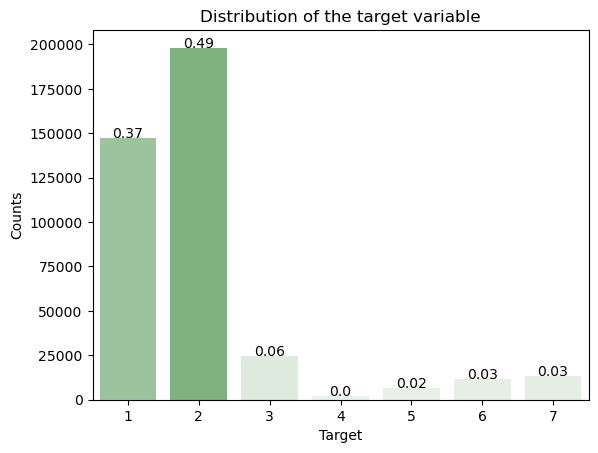

In [18]:
# Convert the Spark DataFrame train_data to a Pandas DataFrame
df_pandas = train_data.toPandas()
# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_train_df = pd.DataFrame(df_pandas, columns=['target'])
y_train_df = y_train_df['target'].groupby(y_train_df['target']).size().reset_index(name='counts')

# Calculate the proportions for each class
y_train_df['proportion'] = y_train_df['counts'] / y_train_df['counts'].sum()

# Create a custom colormap with different shades of green based on the proportion of each class
colormap = sns.light_palette("green", as_cmap=True)
colors = colormap(y_train_df['proportion'])

# Plot the bar chart with the custom colormap
sns.barplot(x='target', y='counts', data=y_train_df, palette=colors)

# Add annotations to the bars at the top - the proportion of each class
for index, row in y_train_df.iterrows():
    plt.text(row.name, row.counts, round(row.proportion, 2), color='black', ha="center")

# Set the title and labels
plt.title('Distribution of the target variable')
plt.xlabel('Target')
plt.ylabel('Counts')
plt.show()


From the bar plot, we can see that the classes are highly imbalanced. The majority classes (1 and 2) have 85% of the observations, while the minority classes (3, 4, 5, 6, and 7) have less than 15% of the observations. That's something we'll need to keep in mind when evaluating the model's performance. We'll use the F1-score as the evaluation metric, as it's more appropriate for imbalanced datasets.

#### Check linearity of features

One of the main assumptions of decision trees (and by extension, random forests) is that the relationship between the input features and the target variable is non-linear and can be represented by a series of splits on the input features.

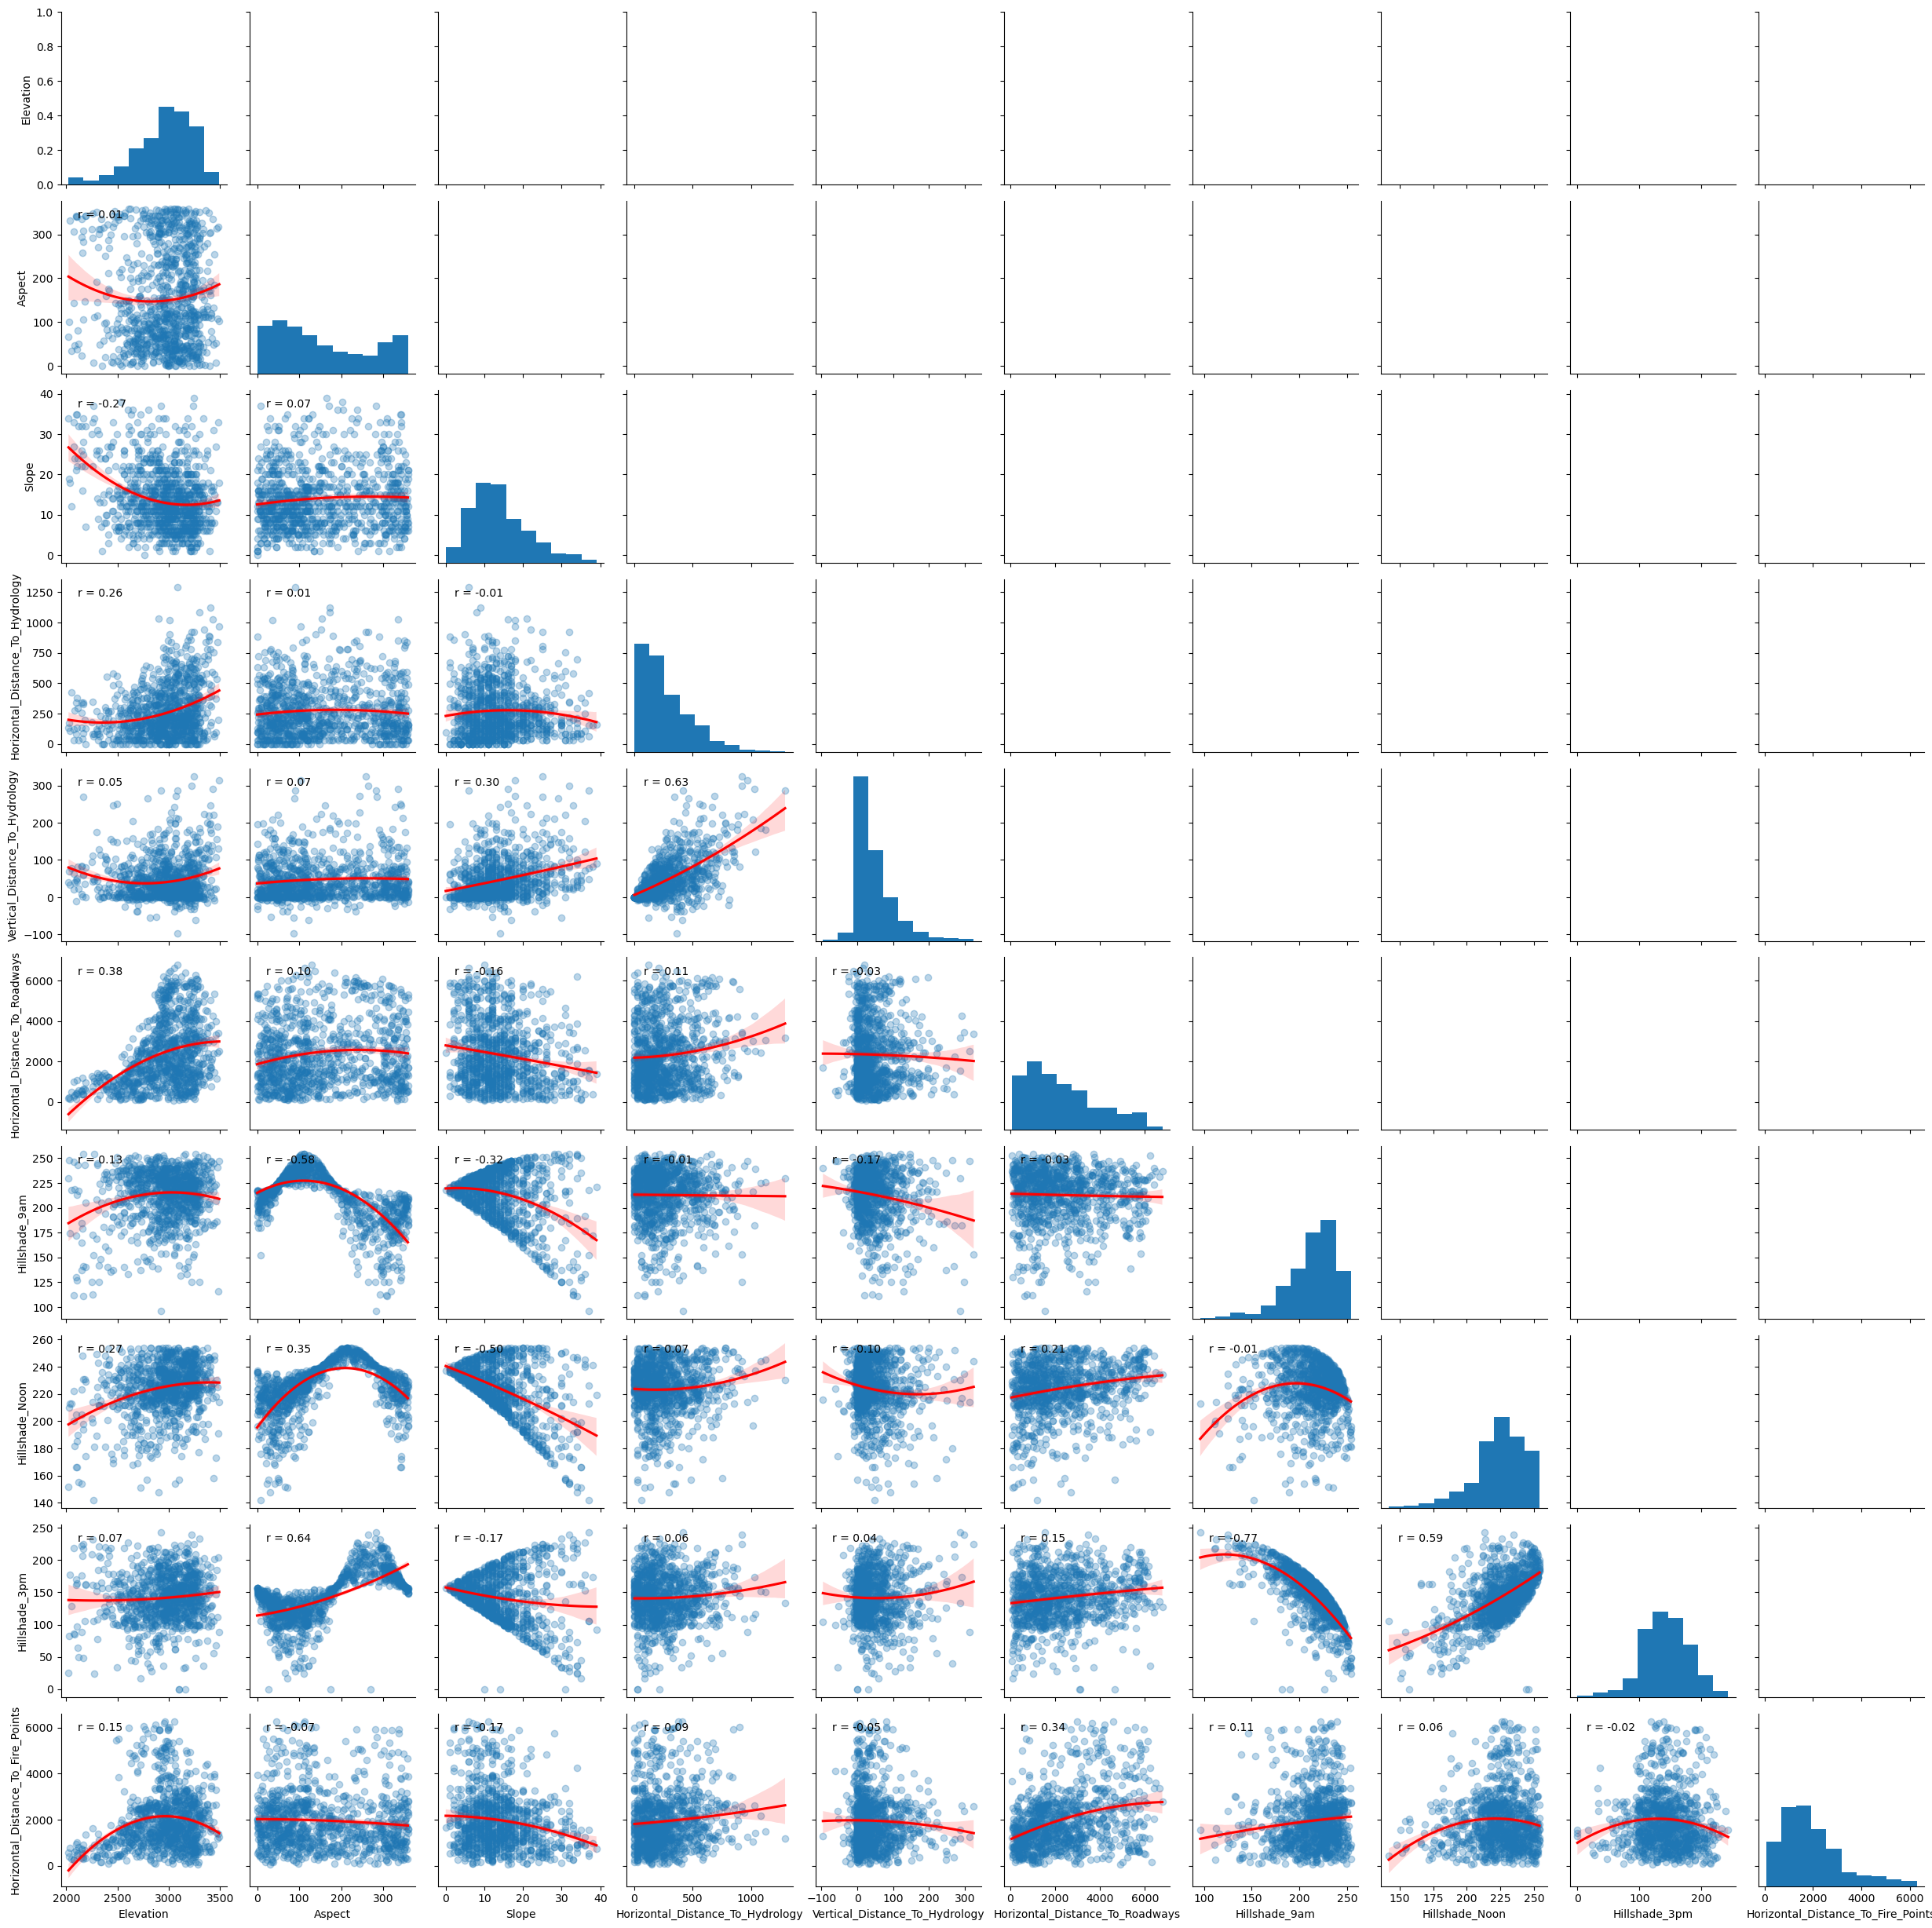

In [20]:
from scipy.stats import pearsonr

# Check for multivariate normality
# Visualize the distributions of numerical features using pair plots
def corrfunc(x, y, **kwargs):
    """
    Function to calculate the Pearson correlation coefficient and annotate the plot with the value.
    """
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes)

# Create a DataFrame with the numerical features
df_scaled_numerical = df_scaled_full.select(df_scaled_full.columns[:10])
numerical_data = df_scaled_numerical.toPandas()

# Sample 1000 points for faster plotting
sampled_data = numerical_data.sample(1000)

# Create a PairGrid with lmplot and annot function
g = sns.PairGrid(sampled_data)
g.map_diag(plt.hist)
g.map_lower(sns.regplot, order=2, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3}) # Set order=2 for polynomial regression
g.map_lower(corrfunc)
g.map_upper(lambda *args, **kwargs: None)  # Set upper plots to be empty

plt.show()



_The scatterplots between many features show non-linear relationships (see the red curves). So, it might be a good idea to apply some ML algorithm, like Random Forest that models more complex relationsips._

## References

**Article on using random forest classifier in PySpark:**

Author: Abhinav Sagar  
Title: "A Guide to Exploit Random Forest Classifier in PySpark"  
Publication: Towards Data Science  
URL: https://towardsdatascience.com/a-guide-to-exploit-random-forest-classifier-in-pyspark-46d6999cb5db

**Dataset on forest cover types:**

Title: "Covertype Data Set"  
Contributors: Jock A. Blackard, Dr. Denis J. Dean, Charles W. Anderson  
Publication: UCI Machine Learning Repository  
URL: http://archive.ics.uci.edu/ml/datasets/covertype

**Documentation on StandardScaler feature transformation in PySpark:**

Title: "StandardScaler"  
Publication: Apache Spark Documentation  
URL: https://spark.apache.org/docs/latest/ml-features#standardscaler